In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Baltimore911.csv', low_memory=False)
missing_values = df.isnull().sum()



In [2]:
df.dropna(inplace=True)


In [3]:
df.drop_duplicates(inplace=True)



,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents


In [79]:
import pandas as pd

# Load your dataset, replace 'your_dataset.csv' with your dataset file path
df = pd.read_csv('Baltimore911.csv', low_memory=False)
#df = pd.read_csv('Baltimore911.csv')

# Total number of call instances/rows
total_rows = len(df)

# Total number of call features/columns
total_columns = len(df.columns)

# Create an empty list to store the profile information
profile_data = []

# Loop through each column in the dataset
for column in df.columns:
    column_data = df[column]
    data_type = str(column_data.dtype)
    
    if column_data.dtype.kind in 'biufc':
        # Numeric attribute
        min_val = column_data.min()
        max_val = column_data.max()
        mean_val = column_data.mean()
        median_val = column_data.median()
        std_val = column_data.std()
        unique_values = None
        top_values = None
        attribute_type = "Numeric"
    else:
        # Discrete attribute
        min_val = None
        max_val = None
        mean_val = None
        median_val = None
        std_val = None
        unique_values = column_data.nunique()
        if unique_values > 0:
            top_values = column_data.value_counts().head(3)
        attribute_type = "Discrete"
    
    missing_percentage = (column_data.isnull().mean() * 100).round(2)
    
    profile_data.append({'Column Name': column, 'Data Type': data_type, 'Min': min_val,
                         'Max': max_val, 'Mean': mean_val, 'Median': median_val, 
                         'Std': std_val, 'Unique Values': unique_values,
                         'Top 1': top_values.index[0] if top_values is not None and len(top_values) >= 1 else None,
                         'Top 2': top_values.index[1] if top_values is not None and len(top_values) >= 2 else None,
                         'Top 3': top_values.index[2] if top_values is not None and len(top_values) >= 3 else None,
                         'Missing (%)': missing_percentage,
                         'Attribute Type': attribute_type})

# Create a DataFrame from the list of profile data
profile_df = pd.DataFrame(profile_data)

# Print the profile table
print(profile_df)


        Column Name Data Type        Min        Max       Mean     Median  \
0         CrimeDate    object        NaN        NaN        NaN        NaN   
1         CrimeTime    object        NaN        NaN        NaN        NaN   
2         CrimeCode    object        NaN        NaN        NaN        NaN   
3          Location    object        NaN        NaN        NaN        NaN   
4       Description    object        NaN        NaN        NaN        NaN   
5    Inside/Outside    object        NaN        NaN        NaN        NaN   
6            Weapon    object        NaN        NaN        NaN        NaN   
7              Post    object        NaN        NaN        NaN        NaN   
8          District    object        NaN        NaN        NaN        NaN   
9      Neighborhood    object        NaN        NaN        NaN        NaN   
10        Longitude   float64 -81.529189 -76.383228 -76.617452 -76.613977   
11         Latitude   float64  37.577262  39.661332  39.306746  39.302672   

In [80]:
# Calculate the number of rows and columns in the profile_df DataFrame
num_rows, num_columns = profile_df.shape

# Print the results
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 16
Number of Columns: 13


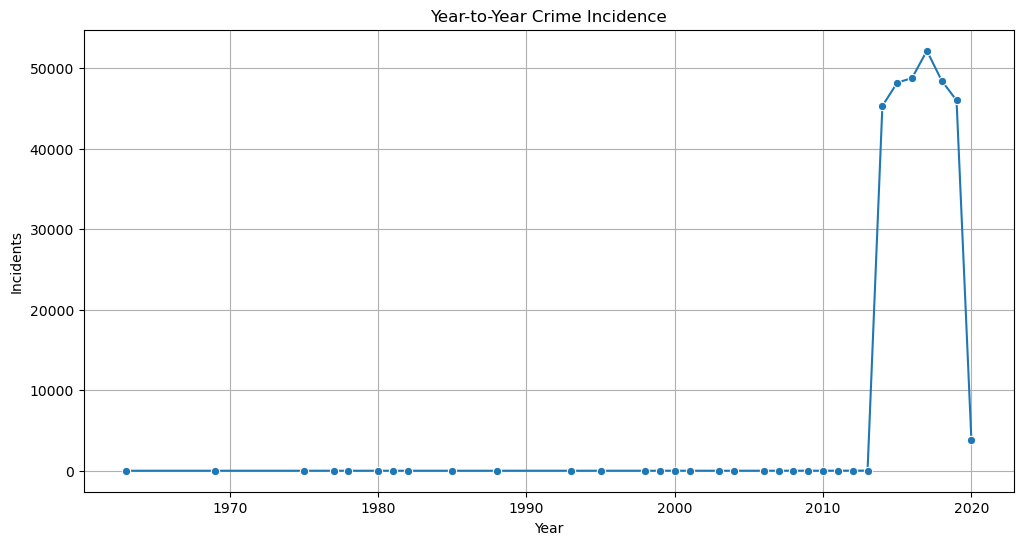

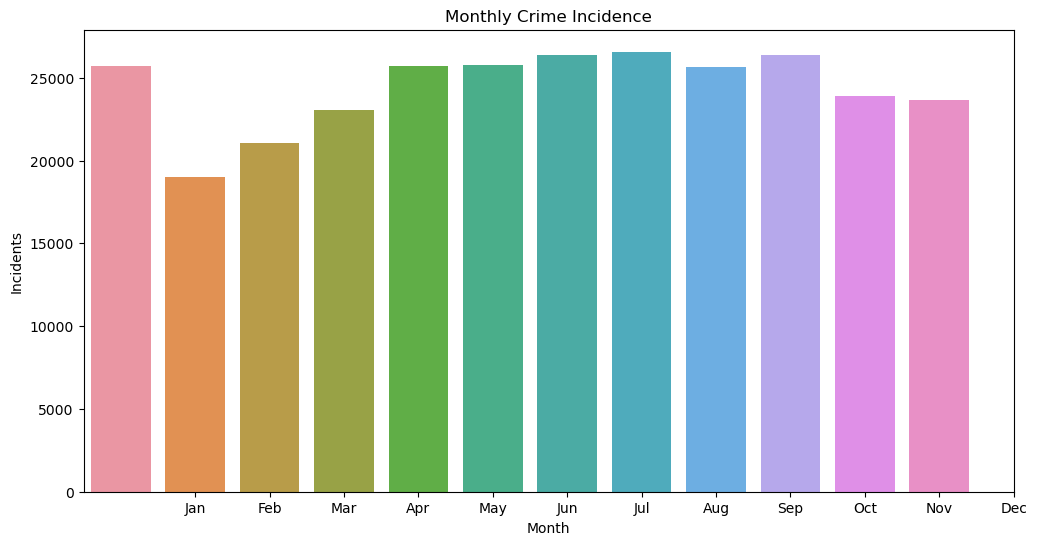

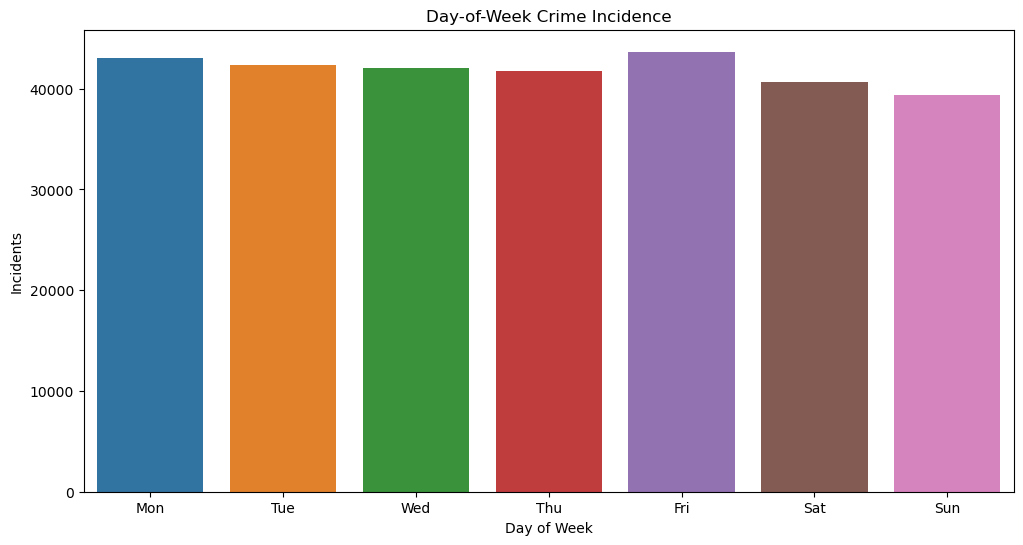

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset, replace 'your_dataset.csv' with your dataset file path
df = pd.read_csv('Baltimore911.csv', low_memory=False)
#df = pd.read_csv('Baltimore911.csv')

# Assuming you have a column named 'date' that contains the date/time of incidents
# You might need to parse it as a datetime object if it's not already
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

df['year'] = df['CrimeDate'].dt.year
df['month'] = df['CrimeDate'].dt.month
df['day_of_week'] = df['CrimeDate'].dt.dayofweek  # Monday = 0, Sunday = 6

# Yearly aggregation
yearly_crime = df.groupby('year').size()

# Monthly aggregation
monthly_crime = df.groupby('month').size()

# Day-of-week aggregation
day_of_week_crime = df.groupby('day_of_week').size()

# Year-to-year plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_crime, marker='o')
plt.title('Year-to-Year Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.grid(True)

# Monthly plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_crime.index, y=monthly_crime.values)
plt.title('Monthly Crime Incidence')
plt.xlabel('Month')
plt.ylabel('Incidents')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Day-of-week plot
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(12, 6))
sns.barplot(x=day_of_week_crime.index, y=day_of_week_crime.values)
plt.title('Day-of-Week Crime Incidence')
plt.xlabel('Day of Week')
plt.ylabel('Incidents')
plt.xticks(ticks=range(7), labels=day_names)

plt.show()



Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')


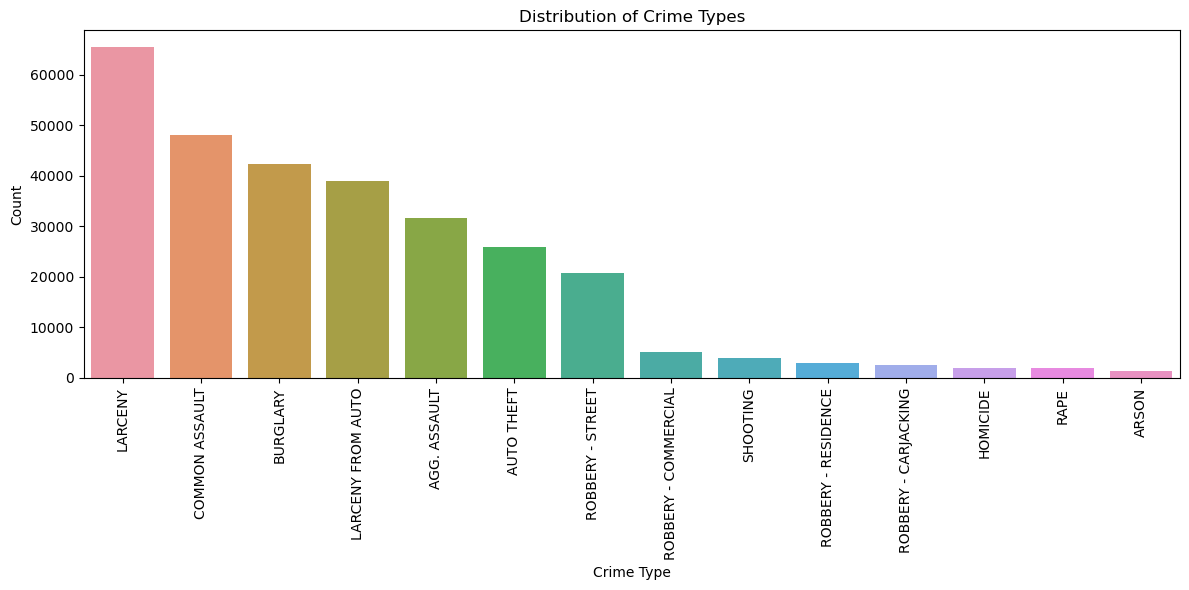

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset, replace 'Baltimore911.csv' with your dataset file path
df = pd.read_csv('Baltimore911.csv', low_memory=False)
#df = pd.read_csv('Baltimore911.csv')

# Check the column names in your dataset
print(df.columns)

# Assuming the 'Description' column contains the crime types, replace 'actual_column_name_for_crime_types' with 'Description'
crime_type_counts = df['Description'].value_counts()

# Create a bar plot for crime type distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values)
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


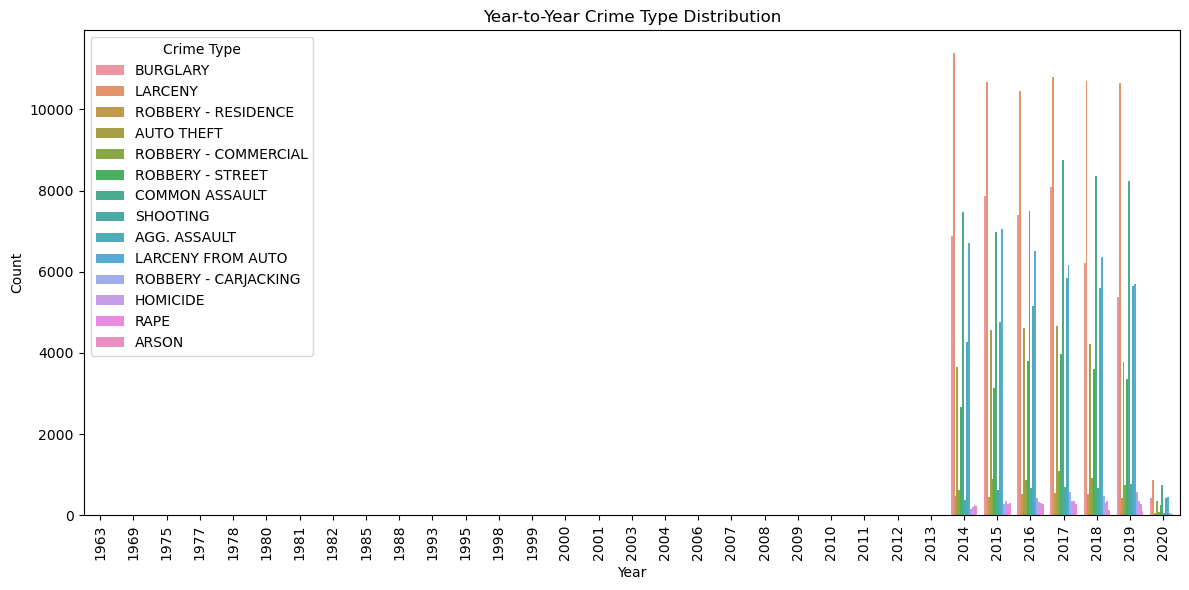

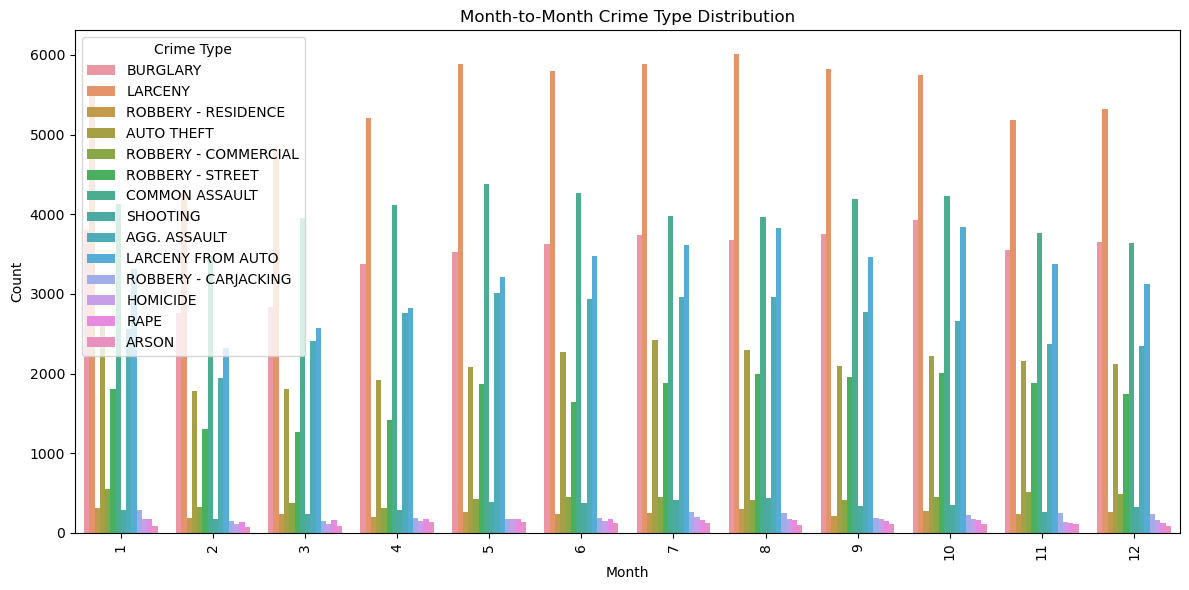

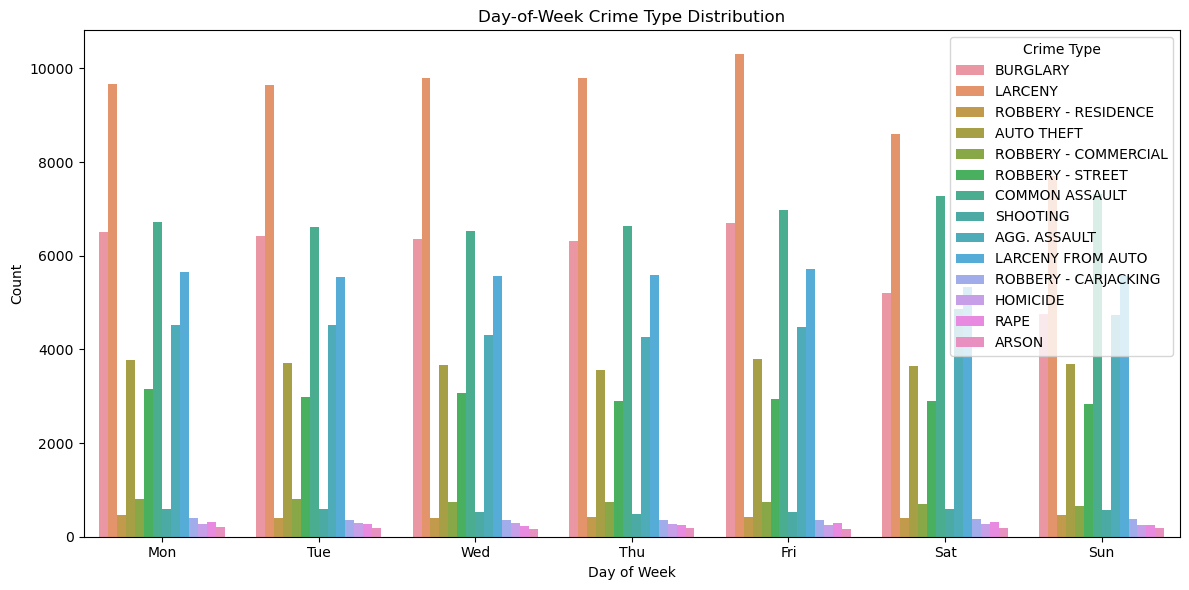

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset, replace 'your_dataset.csv' with your dataset file path
df = pd.read_csv('Baltimore911.csv', low_memory=False)
#df = pd.read_csv('Baltimore911.csv')

# Assuming you have a column named 'CrimeDate' that contains the date of crimes and 'Description' for crime types
# You might need to parse 'CrimeDate' as a datetime object if it's not already
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year from the date
df['Year'] = df['CrimeDate'].dt.year



# Create a bar plot for year-to-year crime type distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', hue='Description')
plt.title('Year-to-Year Crime Type Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Crime Type', loc='upper left')
plt.tight_layout()
plt.show()





# Extract month from the date
df['Month'] = df['CrimeDate'].dt.month

# Create a bar plot for month-to-month crime type distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Month', hue='Description')
plt.title('Month-to-Month Crime Type Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Crime Type', loc='upper left')
plt.tight_layout()
plt.show()






# Extract day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek

# Create a bar plot for day-of-week crime type distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='DayOfWeek', hue='Description')
plt.title('Day-of-Week Crime Type Distribution')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Crime Type', loc='upper right')
plt.tight_layout()
plt.show()


In [8]:
import sys
sys.executable



'C:\\Users\\NIKHIL CHAGANTI\\anaconda3\\python.exe'

In [9]:
!pip show dash


Name: dash
Version: 2.13.0
Summary: A Python framework for building reactive web-apps. Developed by Plotly.
Home-page: https://plotly.com/dash
Author: Chris Parmer
Author-email: chris@plotly.com
License: MIT
Location: c:\users\nikhil chaganti\anaconda3\lib\site-packages
Requires: ansi2html, dash-core-components, dash-html-components, dash-table, Flask, nest-asyncio, plotly, requests, retrying, setuptools, typing-extensions, Werkzeug
Required-by: 


In [10]:
!pip install dash

In [52]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Load your crime dataset (replace with your data source)
data = pd.read_csv('Baltimore911.csv', low_memory=False)
#df = pd.read_csv('Baltimore911.csv', low_memory=False)
# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1('Crime Analysis Dashboard'),
    
    # Dropdown for location selection
    dcc.Dropdown(
        id='location-dropdown',
        options=[
            {'label': location, 'value': location}
            for location in data['Location'].unique()
        ],
        value=data['Location'].iloc[0]
    ),
    
    # Date range selection
    dcc.DatePickerRange(
        id='date-range-picker',
        start_date=data['CrimeDate'].min(),
        end_date=data['CrimeDate'].max()
    ),
    
    # Crime type selection
    dcc.Checklist(
        id='crime-type-checklist',
        options=[
            {'label': crime_type, 'value': crime_type}
            for crime_type in data['Description'].unique()
        ],
        value=data['Description'].unique()
    ),
    
    # Map to display crime incidents
    dcc.Graph(id='crime-map'),
    
    # Line chart for temporal analysis
    dcc.Graph(id='temporal-chart')
])

# Define callback functions to update the map and chart based on user inputs
@app.callback(
    [Output('crime-map', 'figure'), Output('temporal-chart', 'figure')],
    [Input('location-dropdown', 'value'), Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date'), Input('crime-type-checklist', 'value')]
)
def update_figures(selected_location, start_date, end_date, selected_crime_types):
    filtered_data = data[
        (data['Location'] == selected_location) &
        (data['CrimeDate'] >= start_date) &
        (data['CrimeDate'] <= end_date) &
        (data['Description'].isin(selected_crime_types))
    ]

    # Create a map of crime incidents
    map_figure = px.scatter_mapbox(filtered_data, lat='Latitude', lon='Longitude', hover_name='Description')

    # Create a line chart for temporal analysis
    temporal_chart_figure = px.line(filtered_data, x='CrimeDate', y='Description', color='Description',
                                    labels={'Date': 'Date', 'Count': 'Incident Count'},
                                    title='Temporal Analysis of Crime Incidents')

    return map_figure, temporal_chart_figure

# Run the Dash web application
# Run the Dash web application with a custom port
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


In [66]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Read your crime dataset (replace with your data source)
data = pd.read_csv('Baltimore911.csv', low_memory=False)

# Convert the 'CrimeDate' column to datetime
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'])

# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1('Crime Analysis Dashboard'),
    
    # Dropdown for location selection
    dcc.Dropdown(
        id='location-dropdown',
        options=[
            {'label': location, 'value': location}
            for location in data['Location'].unique()
        ],
        value=data['Location'].iloc[0]
    ),
    
    # Date range selection
    dcc.DatePickerRange(
        id='date-range-picker',
        start_date=data['CrimeDate'].min(),
        end_date=data['CrimeDate'].max()
    ),
    
    # Crime type selection
    dcc.Checklist(
        id='crime-type-checklist',
        options=[
            {'label': crime_type, 'value': crime_type}
            for crime_type in data['Description'].unique()
        ],
        value=data['Description'].unique()
    ),
    
    # Map to display crime incidents
    dcc.Graph(id='crime-map'),
    
    # Line chart for temporal analysis
    dcc.Graph(id='temporal-chart')
])

# Define callback functions to update the map and chart based on user inputs
@app.callback(
    [Output('crime-map', 'figure'), Output('temporal-chart', 'figure')],
    [Input('location-dropdown', 'value'), Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date'), Input('crime-type-checklist', 'value')]
)
def update_figures(selected_location, start_date, end_date, selected_crime_types):
    filtered_data = data[
        (data['Location'] == selected_location) &
        (data['CrimeDate'] >= start_date) &
        (data['CrimeDate'] <= end_date) &
        (data['Description'].isin(selected_crime_types))
    ]

    # Create a map of crime incidents
    map_figure = px.scatter_mapbox(filtered_data, lat='Latitude', lon='Longitude', hover_name='Description')

    # Create a line chart for temporal analysis
    temporal_chart_figure = px.line(filtered_data, x='CrimeDate', y='Description', color='Description',
                                    labels={'Date': 'Date', 'Count': 'Incident Count'},
                                    title='Temporal Analysis of Crime Incidents')

    return map_figure, temporal_chart_figure

# Run the Dash web application
#if __name__ == '__main__':
 #   app.run_server(debug=True)
if __name__ == '__main__':
    app.run_server(debug=True, port=8052)

In [78]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Assuming you have your crime dataset in a DataFrame named 'df2'
df2 = pd.read_csv('Baltimore911.csv', low_memory=False)
# Convert 'CrimeDate' to datetime
df2['CrimeDate'] = pd.to_datetime(df2['CrimeDate'])
# Replace missing locations with 'Unknown'
df2['Location'].fillna('Unknown', inplace=True)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Crime Exploration Dashboard"),

    # Dropdown for location
    dcc.Dropdown(
        id='location-dropdown',
        options=[{'label': location, 'value': location} for location in df2['Location'].unique()] + [{'label': 'All', 'value': 'All'}],
        multi=True,
        value=[],  # Default: no location selected
        placeholder="Select Location(s)"
    ),

    # Dropdown for start date
    dcc.Dropdown(
        id='start-date-dropdown',
        options=[{'label': year, 'value': year} for year in df2['CrimeDate'].dt.year.unique()],
        multi=False,
        value=min(df2['CrimeDate'].dt.year),  # Default: minimum year
        placeholder="Select Start Year"
    ),

    # Dropdown for end date
    dcc.Dropdown(
        id='end-date-dropdown',
        options=[{'label': year, 'value': year} for year in df2['CrimeDate'].dt.year.unique()],
        multi=False,
        value=max(df2['CrimeDate'].dt.year),  # Default: maximum year
        placeholder="Select End Year"
    ),

    # Dropdown for month
    dcc.Dropdown(
        id='month-dropdown',
        options=[{'label': month, 'value': month} for month in df2['CrimeDate'].dt.month_name().unique()] + [{'label': 'All', 'value': 'All'}],
        multi=True,
        value=[],  # Default: no month selected
        placeholder="Select Month(s)"
    ),

    # Dropdown for day of the week
    dcc.Dropdown(
        id='day-of-week-dropdown',
        options=[
            {'label': 'Monday', 'value': 0},
            {'label': 'Tuesday', 'value': 1},
            {'label': 'Wednesday', 'value': 2},
            {'label': 'Thursday', 'value': 3},
            {'label': 'Friday', 'value': 4},
            {'label': 'Saturday', 'value': 5},
            {'label': 'Sunday', 'value': 6},
            {'label': 'All', 'value': 'All'}
        ],
        multi=True,
        value=[],  # Default: no day selected
        placeholder="Select Day(s) of the Week"
    ),

    # Dropdown for time
    dcc.Dropdown(
        id='time-dropdown',
        options=[
            {'label': 'Morning (6 AM - 12 PM)', 'value': 'morning'},
            {'label': 'Afternoon (12 PM - 6 PM)', 'value': 'afternoon'},
            {'label': 'Evening (6 PM - 12 AM)', 'value': 'evening'},
            {'label': 'Late Night (12 AM - 6 AM)', 'value': 'latenight'},
            {'label': 'All Times', 'value': 'alltimes'}
        ],
        multi=False,
        value='alltimes',  # Default: All Times
        placeholder="Select Time"
    ),

    # Graph to display crime incidents on a map
    dcc.Graph(id='crime-map'),

    # Additional plots or insights can be added here
])

# Define callback to update the crime map based on user inputs
@app.callback(
    Output('crime-map', 'figure'),
    Input('location-dropdown', 'value'),
    Input('start-date-dropdown', 'value'),
    Input('end-date-dropdown', 'value'),
    Input('month-dropdown', 'value'),
    Input('day-of-week-dropdown', 'value'),
    Input('time-dropdown', 'value')  # Add input for time
)
def update_crime_map(selected_locations, start_date, end_date, selected_months, selected_days, selected_time):
    filtered_df = df2.copy()

    # Apply filters based on user selections
    if selected_locations and 'All' not in selected_locations:
        filtered_df = filtered_df[filtered_df['Location'].isin(selected_locations)]

    filtered_df = filtered_df[
        (filtered_df['CrimeDate'].dt.year >= start_date) &
        (filtered_df['CrimeDate'].dt.year <= end_date)
    ]

    if selected_months and 'All' not in selected_months:
        filtered_df = filtered_df[filtered_df['CrimeDate'].dt.month_name().isin(selected_months)]

    if selected_days and 'All' not in selected_days:
        filtered_df = filtered_df[filtered_df['CrimeDate'].dt.dayofweek.isin(selected_days)]

    # Filter by time
    if selected_time == 'morning':
        filtered_df = filtered_df[(filtered_df['CrimeTime'] >= '06:00:00') & (filtered_df['CrimeTime'] < '12:00:00')]
    elif selected_time == 'afternoon':
        filtered_df = filtered_df[(filtered_df['CrimeTime'] >= '12:00:00') & (filtered_df['CrimeTime'] < '18:00:00')]
    elif selected_time == 'evening':
        filtered_df = filtered_df[(filtered_df['CrimeTime'] >= '18:00:00') & (filtered_df['CrimeTime'] < '00:00:00')]
    elif selected_time == 'latenight':
        filtered_df = filtered_df[((filtered_df['CrimeTime'] >= '00:00:00') & (filtered_df['CrimeTime'] < '06:00:00')) | (filtered_df['CrimeTime'] == '24:00:00')]

    # Calculate description counts dynamically
    description_counts = filtered_df['Description'].value_counts().reset_index()
    description_counts.columns = ['Description', 'DescriptionCount']

    # Merge the description counts back into the filtered DataFrame
    filtered_df = pd.merge(filtered_df, description_counts, on='Description')

    # Create a new column combining Description and DescriptionCount
    filtered_df['DescriptionWithCount'] = filtered_df['Description'] + ' (' + filtered_df['DescriptionCount'].astype(str) + ')'

    # Create a scatter map using Plotly Express with DescriptionWithCount as color
    fig = px.scatter_mapbox(
        filtered_df,
        lat='Latitude',
        lon='Longitude',
        color='DescriptionWithCount',  # Color by description with count
        hover_name='DescriptionWithCount',  # Hover text includes description with count
        zoom=10,
    )

    fig.update_layout(
        mapbox_style="carto-positron",
        margin={"r": 0, "t": 0, "l": 0, "b": 0},
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8059)
